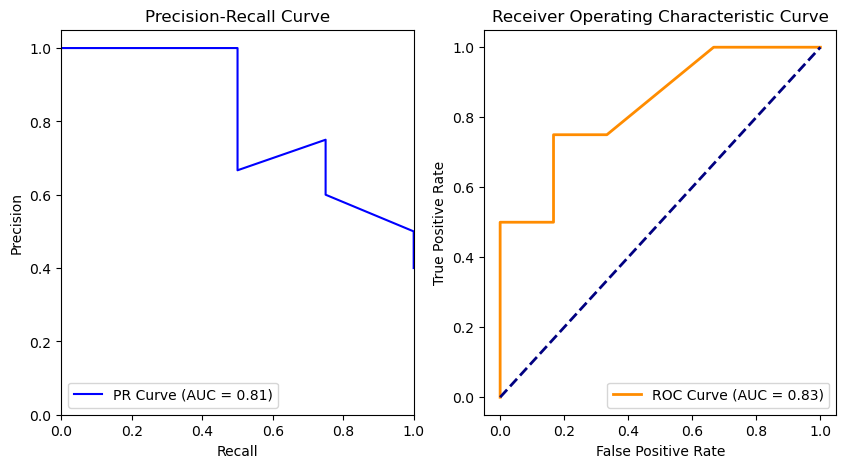

In [1]:
#第一题
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# 假设的数据
data = {
    'instance': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Y_true': [1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
    'Y_score': [0.90, 0.40, 0.20, 0.60, 0.50, 0.40, 0.70, 0.40, 0.65, 0.35]
}

# 提取真实标签和预测分数
Y_true = np.array(data['Y_true'])
Y_score = np.array(data['Y_score'])

# 计算PR曲线的参数
precision, recall, thresholds = precision_recall_curve(Y_true, Y_score)

# 计算ROC曲线的参数
fpr, tpr, roc_thresholds = roc_curve(Y_true, Y_score)

# 计算PR曲线的AUC值
auc_pr = auc(recall, precision)

# 计算ROC曲线的AUC值
auc_roc = auc(fpr, tpr)

# 绘制PR曲线
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='b', label=f'PR Curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# 绘制ROC曲线
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")

plt.show()

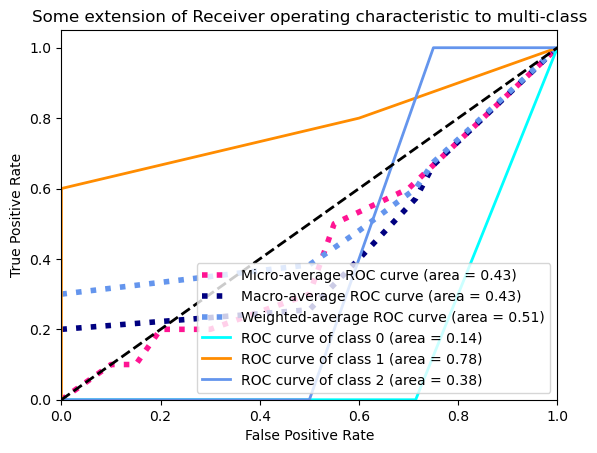

In [2]:
#第二题
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


true_labels = np.array([0, 1, 2, 0, 2, 1, 1, 1, 0, 1])
predict_scores = np.array([[0.1, 0.2, 0.7],
                           [0.1, 0.6, 0.3],
                           [0.5, 0.2, 0.3],
                           [0.1, 0.1, 0.8],
                           [0.4, 0.2, 0.4],
                           [0.6, 0.3, 0.1],
                           [0.4, 0.2, 0.4],
                           [0.4, 0.1, 0.5],
                           [0.1, 0.1, 0.8],
                           [0.1, 0.8, 0.1]])  

# 计算每个类别的ROC曲线
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(
        (true_labels == i).astype(int), predict_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 计算micro平均ROC曲线
all_true_labels = np.zeros((len(true_labels), 3))
all_true_labels[np.arange(len(true_labels)), true_labels] = 1
all_true_labels = all_true_labels.ravel()
all_predict_scores = predict_scores.ravel()
fpr["micro"], tpr["micro"], _ = roc_curve(all_true_labels, all_predict_scores)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# 计算macro平均ROC曲线
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# 计算weighted average平均ROC曲线
weights = np.bincount(true_labels)
all_weighted_tpr = np.zeros_like(all_fpr)
for i in range(3):
    all_weighted_tpr += np.interp(all_fpr, fpr[i], tpr[i]) * weights[i]
all_weighted_tpr /= len(true_labels)
fpr["weighted_avg"] = all_fpr
tpr["weighted_avg"] = all_weighted_tpr
roc_auc["weighted_avg"] = auc(fpr["weighted_avg"], tpr["weighted_avg"])

# 绘制ROC曲线
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"], label='Macro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["macro"]), color='navy', linestyle=':', linewidth=4)

plt.plot(fpr["weighted_avg"], tpr["weighted_avg"], label='Weighted-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["weighted_avg"]), color='cornflowerblue', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()